# Normalization and Cosine Similarity 

Several ML techniques need a way to measure how similar datapoints are in relation to each other.
A common measure is the Cosine Similarity, useful for when you want to cluster data points so that similar data points belong to the same cluster. 

In this notebook, we will manually calculate the cosine similarity of two vectors using the L2 Normalization. L2 normalization is used as a preprocessing step on your data can make the cosine similarity calculation simple- this is expecially helpful for reducing computational burden involved in training ML models with large datasets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity 
# built in function in scikit-learn that helps compute the cosine similarity between two rows of data

from sklearn.preprocessing import Normalizer,normalize
# Normalizer estimator API and normalize function to normalize data

In [2]:
driver_data = pd.read_csv('Datasets/data_1024.csv', delimiter='\t')

We will be using a dataset on driver's information that has about 4000 records, has distance and speeds associated with each feature.

In [3]:
driver_data.head(20)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [4]:
driver_data = driver_data[['Distance_Feature', 'Speeding_Feature']]

In [5]:
driver_data.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041522,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


Looking at the statistics of the data we see that the mean and standard deviation for these features are vastly different

In [6]:
driver_data = driver_data.astype(np.float32)

driver_data.dtypes

Distance_Feature    float32
Speeding_Feature    float32
dtype: object

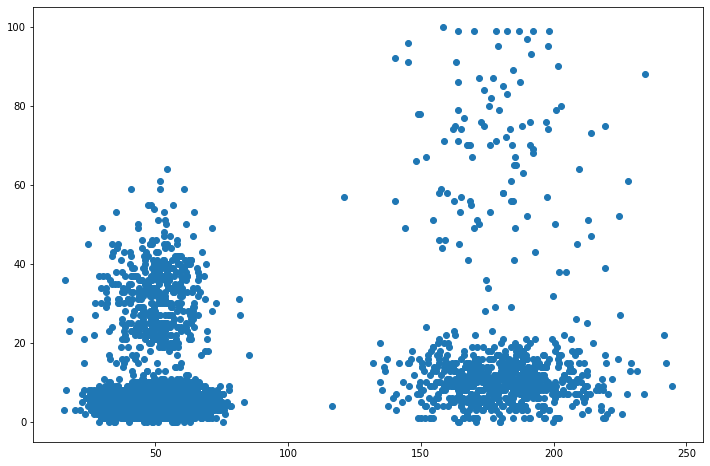

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(driver_data['Distance_Feature'], driver_data['Speeding_Feature'])

Here you can see two clusters (left vs right) or four clusters (top-left, bottom-left, top-right, bottom-right)

In [8]:
def cosine_similarity_manual(d1, d2):
    
    x1 = d1[0]
    y1 = d1[1]

    x2 = d2[0]
    y2 = d2[1]
    
    magnitude = math.sqrt(x1*x1 + y1*y1) * math.sqrt(x2*x2 + y2*y2)
    
    dot_product = x1*x2 + y1*y2
    
    return dot_product / magnitude

x: Distance Feature
y: The speeding Feature

This function manually calculates the cosine similarity for two vectors. First step calculates the maginitude by multiplying the magnitudes of both vectors (L2 Norm), then takes the dot product of teh two vectors. Returns the dot product divided by the vector

L2 Norm- the square root of the sum of the squares of the vector.

In [9]:
d1 = driver_data.loc[0]
d2 = driver_data.loc[1]
d3 = driver_data.loc[8]

In [10]:
d1

Distance_Feature    71.239998
Speeding_Feature    28.000000
Name: 0, dtype: float32

In [11]:
cosine_similarity_manual(d1, d2)

0.9975714725306971

Cosine similarity value close to one shows that d1 and d2 are very similar, when we do the same for d1 and d3 we notice that they are not as similar. Scikit-learn's cosine_similarity function will allow us to cross validate our manual calculation

In [12]:
cosine_similarity_manual(d1, d3)

0.8991255469171173

In [13]:
cosine_similarity(d1.values.reshape(1, -1), d2.values.reshape(1, -1))

array([[0.99757147]], dtype=float32)

In [14]:
cosine_similarity(d1.values.reshape(1, -1), d3.values.reshape(1, -1))

array([[0.8991256]], dtype=float32)

Next we will call the normalize function to convert every sample vector in our input data tp be normalized to the unit L2 Norm, meaning that the sum of squares of each vector will be equal to 1. 

In [15]:
normalized_data = pd.DataFrame(normalize(driver_data, norm='l2'), columns=driver_data.columns)

In [16]:
normalized_data.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437


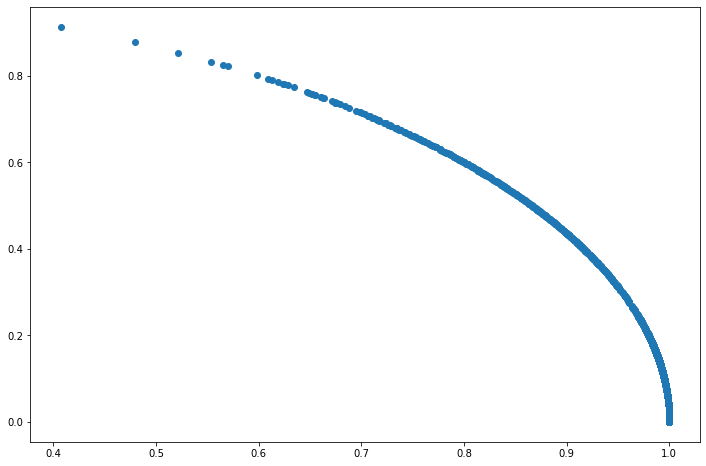

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(normalized_data['Distance_Feature'], normalized_data['Speeding_Feature'])

In [18]:
normalized_data['Magnitude'] = normalized_data['Distance_Feature'] * normalized_data['Distance_Feature'] + \
        normalized_data['Speeding_Feature'] * normalized_data['Speeding_Feature']

This calculates the sum of squares, we do not take the square root since the square root of 1 is 1

In [19]:
normalized_data.head(10)

,Distance_Feature,Speeding_Feature,Magnitude
0,0.930694,0.365798,1.0
1,0.902956,0.429733,1.0
2,0.922526,0.385934,1.0
3,0.930058,0.367414,1.0
4,0.909165,0.416437,1.0
5,0.972694,0.232091,1.0
6,0.946465,0.322805,1.0
7,0.988380,0.152000,1.0
8,0.676705,0.736255,1.0
9,0.919070,0.394095,1.0


In [20]:
def cosine_similarity_manual_normalized(d1, d2):
    
    x1 = d1[0]
    y1 = d1[1]

    x2 = d2[0]
    y2 = d2[1]
    
    magnitude = 1
    
    dot_product = x1*x2 + y1*y2
    
    return dot_product / magnitude

This function will simulate the cosine similarity operation on normalized data, this differs from the other manual cosine similarity function in its magnitude calculation- since it is on normalized data and removed the computational overhead for the magnitude calculation.

In [21]:
d1 = normalized_data.loc[0]
d2 = normalized_data.loc[1]
d3 = normalized_data.loc[8]

In [22]:
cosine_similarity_manual_normalized(d1, d2)

0.9975714683532715

In [23]:
cosine_similarity_manual_normalized(d1, d3)

0.8991255760192871

### Clustering in TensorFlow using KMeansClustering and cosine similarity

Here we will use a clustering algorithm where we can specify that the similarity measure to cluster our data is the cosine similarity 

In [24]:
!pip3 install -U tensorflow

Requirement already up-to-date: tensorflow in /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (2.3.0)


In [25]:
import tensorflow as tf

from tensorflow.compat.v1.estimator.experimental import KMeans as KMeansClustering

Since the tensorflow used in the pluralsight course is outdated (v1.0 vs v2.0) there are some slight modifications I made to get the code working for the current tensorflow version
- First I had to change the jupyter kernel to have tensorflow env within it
- the Kmeans clustering has moved in location so I have modified the import statement for it

In [26]:
print(tf.__version__)

2.0.0


In [27]:
def input_fn(x):
    return tf.train.limit_epochs(
        tf.convert_to_tensor(x, dtype=tf.float32), 
        num_epochs=1)

The next line produces a warning that the model will be in a temporary directory, to fix this specify a model directory using model_dir

In [28]:
kmeans_estimator = KMeansClustering(num_clusters=2, distance_metric=KMeansClustering.COSINE_DISTANCE )
drivers_array = driver_data.values.astype(np.float32)

drivers_array

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmp9b6v59wr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a47ff6850>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]], dtype=float32)

In [29]:
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(drivers_array, dtype=tf.float32), num_epochs=1)

In [30]:
num_iterations = 5

for _ in range(num_iterations):
    kmeans_estimator.train(input_fn, steps=1)
    
    cluster_centers = kmeans_estimator.cluster_centers()


print('\n\nCluster centers:\n', cluster_centers)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
Prefer Dataset.range instead.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
dim is deprecated, use axis instead
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmp9b6v59wr/model.ckpt.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmp9b6v59wr/model.ckpt.
INFO:tensorflow:Loss f

In [31]:

kmeans_estimator_2 = KMeansClustering(num_clusters=2, distance_metric=KMeansClustering.COSINE_DISTANCE)

drivers_array = normalized_data[['Distance_Feature', 'Speeding_Feature']].values.astype(np.float32)

drivers_array

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmpm3vsa33a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a498b1fd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


array([[0.93069434, 0.3657979 ],
       [0.90295583, 0.42973343],
       [0.9225262 , 0.3859344 ],
       ...,
       [0.99754417, 0.07003996],
       [0.9995973 , 0.02837508],
       [0.9985686 , 0.0534852 ]], dtype=float32)

In [32]:
num_iterations = 5

for _ in range(num_iterations):
    kmeans_estimator_2.train(input_fn, steps=1)
    
    cluster_centers = kmeans_estimator_2.cluster_centers()


print('\n\nCluster centers:\n', cluster_centers)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmpm3vsa33a/model.ckpt.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmpm3vsa33a/model.ckpt.
INFO:tensorflow:Loss for final step: None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmpm3vsa33a/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/y9/y2dg_q814vd4h2wr3v8r_6dh0000gn/T/tmpm3vsa33a/model.ckpt.
INFO:tenso

The moral of having normalized data is that the computational overhead of the kmeans function was greatly reduced as seen when we ran both versions of the estimator